In [ ]:
## 최신 기출동형 모의고사 - 제3회 기출동형 모의고사
## 1. 머신러닝 (50점)

In [1]:
# (1) 데이터를 탐색하고 탐색 결과를 제시하시오.
# (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.
# (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.
# (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.
# (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [2]:
import pandas as pd
import numpy as np 
hotel = pd.read_csv('C:/adp/data/hotel_bookings.csv')
hotel

## 결측치 확인
hotel.isna().sum()
# lead_time, is_repeated_guest, adr 결측치가 존재함

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [3]:
#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.
hotel.info()
# object 변수는 인코딩 필요
# lead_time, is_repeated_guest, adr 변수는 결측치가 존재하여 결측치 처리 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [4]:
hotel.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


In [5]:
hotel['deposit_type'].value_counts()
# deposit_type에 데이터 불균형

No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64

(array([19138.,     0.,     0.,     0.,     0.,    28.,     0.,     0.,
            0.,   834.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

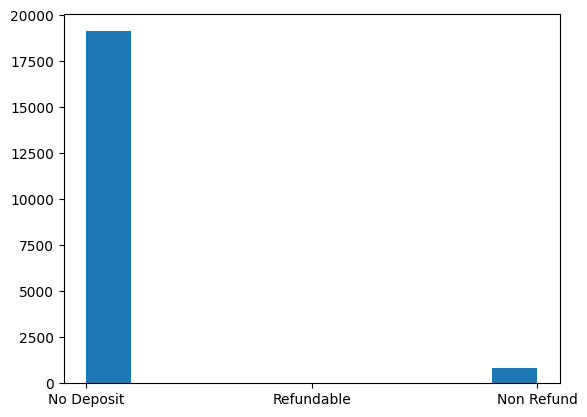

In [6]:
import matplotlib.pyplot as plt
plt.hist(hotel['deposit_type'])

(array([1.196e+03, 6.500e+03, 7.151e+03, 2.680e+03, 9.360e+02, 3.500e+02,
        9.400e+01, 2.200e+01, 5.000e+00, 3.000e+00]),
 array([ -6.38 ,  39.408,  85.196, 130.984, 176.772, 222.56 , 268.348,
        314.136, 359.924, 405.712, 451.5  ]),
 <BarContainer object of 10 artists>)

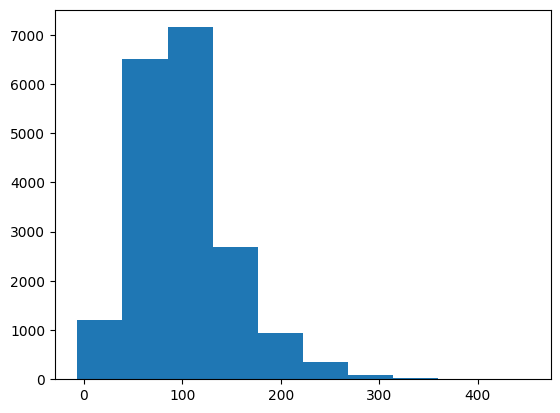

In [7]:
plt.hist(hotel['adr'])

In [8]:
## (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.
# lead_time, is_repeated_guest, adr 결측치가 존재하며 
# 데이터를 삭제로 인한 데이터 손실을 방지하고자 최근접이웃대체법으로 대체함
from sklearn.impute import KNNImputer
hotel_fill_columns = ['lead_time', 'is_repeated_guest', 'adr']
imputer = KNNImputer()
hotel_knnim = imputer.fit_transform(hotel[hotel_fill_columns])
hotel[hotel_fill_columns] = hotel_knnim

In [9]:
hotel.isna().sum() # 결측치 대체 완료

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

In [10]:
## (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오.
hotel['is_repeated_guest'].value_counts() 
# is_repeated_guest 변수에 0 값이 대부분임
# is_repeated_guest에서 0이외의 데이터를 더 수집하여 불균형을 해소한다.

0.0    19195
1.0      749
0.2       45
0.4        8
0.8        2
0.6        1
Name: is_repeated_guest, dtype: int64

In [11]:
# 각 변수에 IQR 방식으로 이상치를 보정해주어 극단값을 제거함으로써 모델의 정확도를 향상한다.

(array([17600.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2400.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

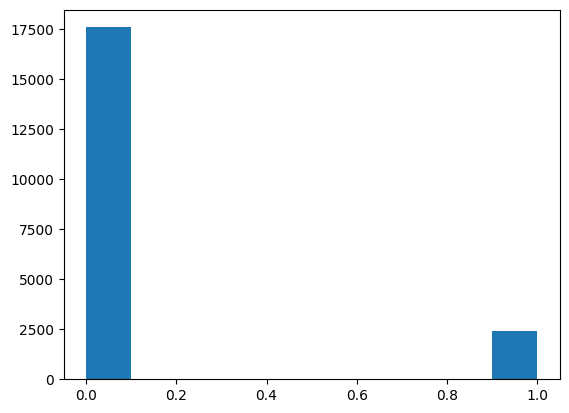

In [12]:
#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.
plt.hist(hotel['is_canceled'])
# is_canceled 변수는 0,1로 이루어진 데이터이며 0,1에 비율이 88%,12%의 비율이므로
# 해당 데이터는 불균형한 데이터이다.

In [13]:
# (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.
# 오버 샘플링 기법은 비중이 작은 데이터를 추가로 생성해 수를 늘려 데이터 불균형을 극복하는 방식이다.
# 언더 샘플링 기법은 반대로 비중이 높은 데이터를 삭제해 데이터 불균형을 극복하는 방식이다. 
# 삭제로 인한 데이터 손실이 발생하므로 오버 샘플링을 주로 사용한다.
# 오버 샘플링에는 Random 오버 샘플링과 SMOTE 방식이 있다.

# Random 오버 샘플링는 무작위로 동일한 표본을 복사하는 방식으로 데이터를 증식한다.
# 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
# RANDOM Oversampling은 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

# SMOTE
# SMOTE는 적은 데이터세트에 있는 개별 데이터들의 K-최근접 이웃을 찾아, 해당 데이터와 가장 가까운 데이터를 생성하는 방식.
# SMOTE는 RANDOM Oversampling 보다는 처리속도가 느리다는 단점이 있지만, 과적합 문제를 해결할 수 있다는 장점이 있다.


In [14]:
#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.
# RANDOM Oversampling 간단하게 데이터 불균형을 해결할 수 있어서 선택함
# SMOTE는 데이터 과적합을 해결할 수 있어서 선택함

In [15]:
# object변수 인코딩
hotel02 = pd.get_dummies(hotel)

In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# 원본데이터 hotel02
X = hotel02.drop('is_canceled', axis = 1)
y = hotel02['is_canceled']

# RANDOM Oversampling
ros = RandomOverSampler(random_state = 2023)
X_ro, y_ro = ros.fit_resample(X, y)

In [17]:
# SMOTE
sm = SMOTE(random_state = 2023)
X_sm, y_sm = sm.fit_resample(X, y)

In [18]:
#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.
# 원본데이터
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time

start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 3)
clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10)

clf.fit(X_train, y_train)
print('train 정확도 : ', clf.score(X_train, y_train))
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
print('test 정확도 : ', clf.score(X_test, y_test) )

print('time : ', time.time() - start)

train 정확도 :  0.9338571428571428
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5280
           1       0.96      0.38      0.55       720

    accuracy                           0.92      6000
   macro avg       0.94      0.69      0.75      6000
weighted avg       0.93      0.92      0.91      6000

test 정확도 :  0.9238333333333333
time :  1.458061933517456


In [19]:
# 랜덤오버샘플링
start = time.time()
X_ro_train, X_ro_test, y_ro_train, y_ro_test = train_test_split(X_ro, y_ro, test_size = 0.3, stratify = y_ro, random_state = 3)
clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10)

clf.fit(X_ro_train, y_ro_train)
print('train 정확도 : ', clf.score(X_ro_train, y_ro_train))
pred = clf.predict(X_ro_test)
print(classification_report(y_ro_test, pred))
print('test 정확도 : ', clf.score(X_ro_test, y_ro_test) )

print('time : ', time.time() - start)

train 정확도 :  0.9806818181818182
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5280
           1       0.93      0.95      0.94      5280

    accuracy                           0.94     10560
   macro avg       0.94      0.94      0.94     10560
weighted avg       0.94      0.94      0.94     10560

test 정확도 :  0.9390151515151515
time :  2.4902637004852295


In [23]:
# SMOTE
start = time.time()
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size = 0.3, stratify = y_sm, random_state = 2)
clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10)

clf.fit(X_sm_train, y_sm_train)
print('train 정확도 : ', clf.score(X_sm_train, y_sm_train))
pred = clf.predict(X_ro_test)
print(classification_report(y_sm_test, pred))
print('test 정확도 : ', clf.score(X_sm_test, y_sm_test) )

print('time : ', time.time() - start)


train 정확도 :  0.9637987012987013
              precision    recall  f1-score   support

           0       0.50      0.61      0.55      5280
           1       0.50      0.40      0.44      5280

    accuracy                           0.50     10560
   macro avg       0.50      0.50      0.50     10560
weighted avg       0.50      0.50      0.50     10560

test 정확도 :  0.8820075757575757
time :  2.687739610671997


In [ ]:
# 정확도 측면에서는 Random 오버 샘플링을 선정하고 시간 측면에서는 원데이터가 가장 우수하다.
# 다만, Random 오버 샘플링은 과적합으로 인해서 정확도가 높게 나올수 있어서 주의가 필요하다.

In [ ]:
# (8) 결과 작성
# 원데이터의 train 정확도 :  0.9339285714285714이고 test 정확도 :  0.9248333333333333 로 매우 높아 과적합이 발생함을 추정할 수 잇따.
# smote 오버샘플링 후 분석한 결과는 train 정확도 :  0.9607954545454546이고 test 정확도 :  0.8829545454545454 으로 과적합이 다소 해소됨을 확인할 수 있다.
# 오버샘플링을 통해서 분석의 정확도가 낮아졌다고 생각할 수 있으나, 이는 과적합에 대한 해소가 발생하였기 때문이자.
# 따라서, 예측모델 일반화가 가능한 Case는 SMOTE 오버샘플링을 통한 분석이다.